<AxesSubplot:xlabel='revenue', ylabel='Count'>

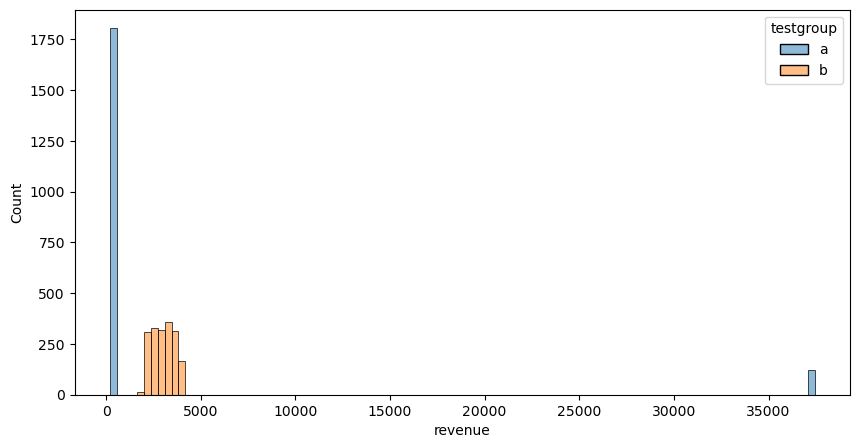

In [21]:
# Распределение платежей в каждой группе

plt.figure(figsize=(10, 5))
sns.histplot(x = 'revenue', data = df.query('revenue != 0'), hue = 'testgroup')

C:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warni

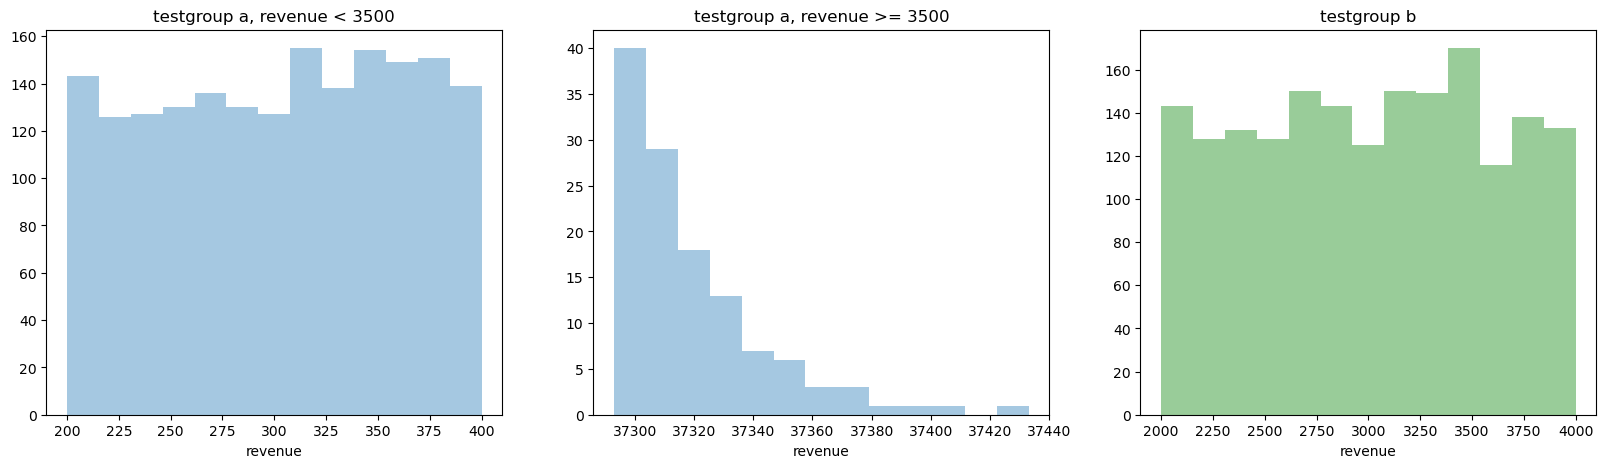

In [22]:
fig, ax = plt.subplots(1,3, figsize=(20, 5))
sns.distplot(df.query('revenue != 0 & testgroup == "a" & revenue < 3500').revenue, kde=False, ax=ax[0]).set_title('testgroup a, revenue < 3500')
sns.distplot(df.query('revenue != 0 & testgroup == "a" & revenue >= 3500').revenue, kde=False, ax=ax[1]).set_title('testgroup a, revenue >= 3500')
sns.distplot(df.query('revenue != 0 & testgroup == "b"').revenue, kde=False, ax=ax[2], color = 'green').set_title('testgroup b')


plt.show()

В распределении виден сильный разброс в платежах контрольной группы и оно не выглядит нормальным.

Разбиваем данные на два датафрейма, чтобы посмотреть по количеству групп.

In [23]:
df_a = df.query('testgroup == "a"')
df_b = df.query('testgroup == "b"')

In [24]:
# Доход пользователей, которые заплатили
    
df_a.query('revenue != 0').revenue.describe()

count     1928.000000
mean      2663.998444
std       9049.039763
min        200.000000
25%        257.000000
50%        311.000000
75%        361.000000
max      37433.000000
Name: revenue, dtype: float64

In [25]:
df_a.query('revenue > 3500').sort_values('revenue')

,user_id,revenue,testgroup
19495,19496,37293,a
81477,81478,37294,a
235858,235859,37294,a
254113,254114,37294,a
34534,34535,37294,a
...,...,...,...
142804,142805,37379,a
21585,21586,37385,a
65077,65078,37394,a
196601,196602,37407,a


In [26]:
df_b.query('revenue != 0').revenue.describe()

count    1805.000000
mean     3003.658172
std       572.619709
min      2000.000000
25%      2513.000000
50%      3022.000000
75%      3478.000000
max      4000.000000
Name: revenue, dtype: float64

В контрольной группе среднее и медианное значение сильно отличаются. В тестовой группе среднее и медианное примерно одинаковые.

Так же в контрольной группе стандартное отклонение равно 9049 это значит, что имеется большой разброс значений. Распределение платежей не подходит под нормальное. Это значит, что к данным можно примерить метод бутстрап.